Neural Networks are a class of models within the general machine learning literature. They are inspired by biological neural networks and are designed to replicate their ability to learn. They do this by learning to transform input data into a desired output through a process of training and optimization.

Key Concepts:
1. **Neurons**: The basic unit of computation in a neural network is the neuron. It takes a set of inputs, performs a dot product on them, applies an activation function (like the sigmoid function), and passes the output to the next layer.

2. **Layers**: A neural network is typically organized in layers. Layers are made up of a number of interconnected 'nodes' which contain an 'activation function'. Patterns are presented to the network via the 'input layer', which communicates to one or more 'hidden layers' where the actual processing is done via a system of weighted 'connections'. The hidden layers then link to an 'output layer'.

3. **Weights and Biases**: These are the parameters of the model that are learned during training. They are initialized with random values and are updated to minimize the loss function during the training process.

4. **Activation Functions**: These are mathematical equations that determine the output of a neural network. The function is attached to each neuron in the network, and determines whether it should be activated (“fired”) or not, based on whether each neuron’s input is relevant for the model’s prediction.

The **Sigmoid Function** is a type of activation function that is traditionally very popular for neural networks. The input to the function is transformed into a value between 0.0 and 1.0. Inputs that are much larger than 1.0 are transformed to the value 1.0, similarly, values much smaller than 0.0 are snapped to 0.0. The shape of the function for all possible inputs is an S-shape from zero up through 0.5 to 1.0. It was popular because it has a nice interpretation, the output of the function can be used to represent a probability for binary classification problems.

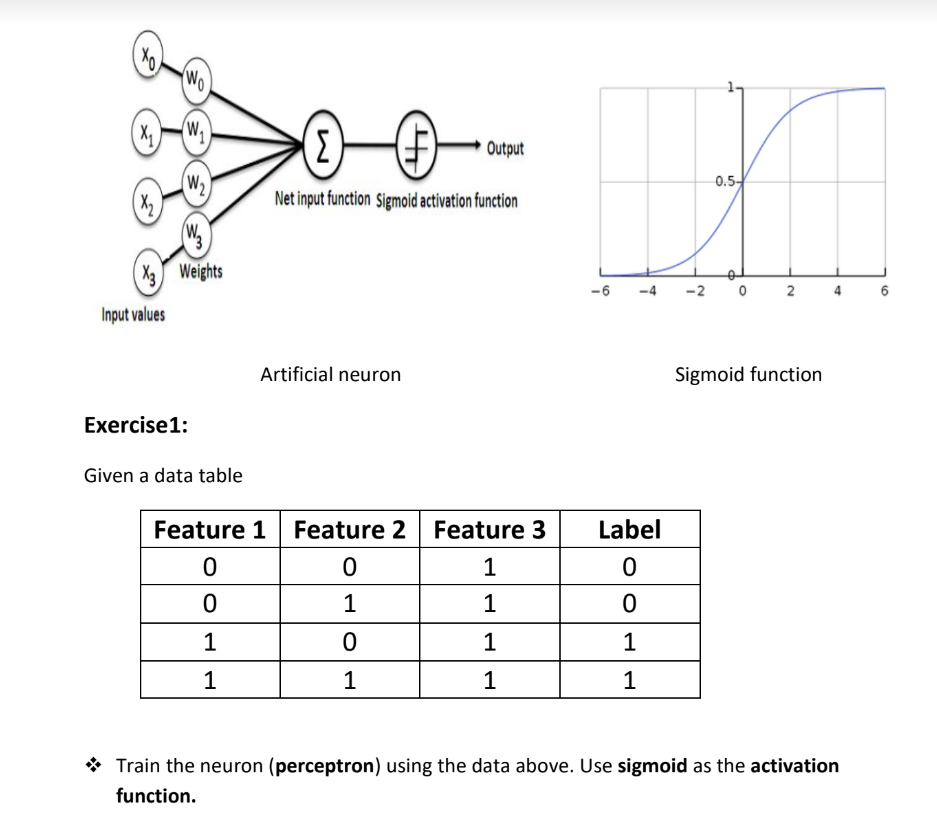

In [38]:
import pandas as pd
import numpy as np

In [39]:
X = np.array(
    [ 
     [0, 0, 1], 
     [0, 1, 1], 
     [1, 0, 1], 
     [1, 1, 1]
     ]
    )

Y = np.array([[0, 0, 1, 1]]).T

In [40]:
def sigmoid(x, deriv=False):
    if deriv == True:
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

In [41]:
W = 2 * np.random.random((3, 1)) - 1

In [42]:
W

array([[-0.00386277],
       [ 0.57961823],
       [ 0.95862861]])

In [43]:
Y

array([[0],
       [0],
       [1],
       [1]])

In [44]:
X

array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 1]])

In [45]:
i = 0
while i < 10000:
    i += 1
    output = sigmoid(np.dot(X, W))
    error = Y - output
    W = W + np.dot(X.T, error * sigmoid(output, True))

In [46]:
W

array([[ 9.67251602],
       [-0.20838512],
       [-4.62907483]])

In [47]:
print(output)

[[0.00966987]
 [0.00786522]
 [0.99358952]
 [0.992116  ]]


In [48]:
prediction = sigmoid(np.dot(np.array([1, 0, 0]), W), False)
print(prediction)

[0.99993701]


Let's Modify the dataset to obvserve how does the perceptron change its behaviour towards the predicted value of the observation [ 1, 0, 0]

In [49]:
X = np.array(
    [ 
     [0, 0, 1], 
     [0, 1, 1], 
     [1, 0, 1], 
     [1, 1, 1]
     ]
    )

Y = np.array([[0, 1, 1, 0]]).T

In [50]:
W = 2 * np.random.random((3, 1)) - 1

i = 0
while i < 100000:
    i += 1
    output = sigmoid(np.dot(X, W))
    error = Y - output
    W = W + np.dot(X.T, error * sigmoid(output, True))

In [51]:
prediction = sigmoid(np.dot(np.array([1, 0, 0]), W), False)
print(prediction)

[0.5]


The classifier with one layer is not performing well, and that's because tha data we have can't be classified using a linear classifier, we'll have to augment the number of layers

In [52]:
class TwoLayerNNClassifier:
    def __init__(self, W0= 2 * np.random.random((3, 4)) - 1, W1= 2 * np.random.random((4, 1)) - 1):
        self.W0 = W0
        self.W1 = W1

    def sigmoid(self, x, deriv=False):
        if deriv:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def fit(self, X, Y):

        for i in range(100000):
            layer0 = X
            layer1 = self.sigmoid(np.dot(layer0, self.W0))
            layer2 = self.sigmoid(np.dot(layer1, self.W1))

            l2_error = Y - layer2
            l2_delta = l2_error * self.sigmoid(layer2, deriv=True)

            l1_error = l2_delta.dot(self.W1.T)
            l1_delta = l1_error * self.sigmoid(layer1, deriv=True)

            self.W1 += layer1.T.dot(l2_delta)
            self.W0 += layer0.T.dot(l1_delta)
        return layer2

    def predict(self, X):
        layer0 = X
        layer1 = self.sigmoid(np.dot(layer0, self.W0))
        layer2 = self.sigmoid(np.dot(layer1, self.W1))
        return layer2

    @staticmethod
    def binary_threshold(x):
        return 1 if x > 0.5 else 0

This is a simple implementation of a 2-layer Neural Network (one hidden layer and one output layer) using backpropagation for training /

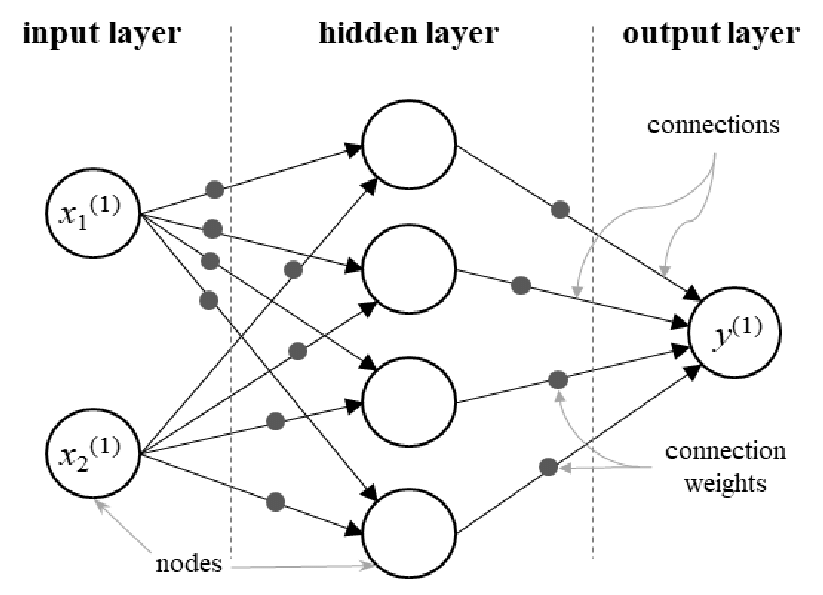

1. `np.random.seed(1)`: This is used for reproducibility. It ensures that the random numbers generated are the same every time the code is run.

2. `W0` and `W1` are the weight matrices for the first (hidden) and second (output) layers respectively. They are initialized with random values between -1 and 1.

3. The `for` loop runs for 100,000 iterations. Each iteration is a complete pass (forward and backward) over the entire dataset, also known as an epoch.

4. `layer0 = X`: This is the input layer.

5. `layer1 = sigmoid(np.dot(layer0, W0))`: This is the hidden layer. The inputs are multiplied by the weights (`np.dot(layer0, W0)`) and the sigmoid function is applied to these values.

6. `layer2 = sigmoid(np.dot(layer1, W1))`: This is the output layer. The outputs from `layer1` are multiplied by the weights (`np.dot(layer1, W1)`) and the sigmoid function is applied to these values.

7. `l2_error = Y - layer2`: This calculates the error of the output layer by subtracting the predicted output from the actual output.

8. `l2_delta = l2_error * sigmoid(layer2, deriv=True)`: This calculates the delta for the output layer, which is the error adjusted by the derivative of the sigmoid function. This delta represents the direction and amount to adjust the weights by.

9. `l1_error = l2_delta.dot(W1.T)`: This calculates the error for the hidden layer by multiplying `l2_delta` with the transpose of `W1`. This distributes the error of `layer2` to the neurons in `layer1`.

10. `l1_delta = l1_error * sigmoid(layer1, deriv=True)`: This calculates the delta for the hidden layer, which is the error adjusted by the derivative of the sigmoid function.

11. `W1 += layer1.T.dot(l2_delta)` and `W0 += layer0.T.dot(l1_delta)`: These lines update the weights by adding the dot product of the outputs and the deltas. This is the backpropagation step where the weights are adjusted in the direction that reduces the error.

The theory behind this is the concept of training neural networks using gradient descent and backpropagation. 

The goal is to adjust the weights to minimize the error of the output. 

The error is propagated back from the output layer to the hidden layer, and the weights are updated in the direction that reduces the error.

The sigmoid function is used as the activation function, introducing non-linearity into the model, allowing it to learn more complex patterns.

The results are continous values, in order to get binary classification results, a threshholding can be applied.

In [54]:
X = np.array(
    [ 
     [0, 0, 1], 
     [0, 1, 1], 
     [1, 0, 1], 
     [1, 1, 1]
     ]
    )

Y = np.array([[0, 1, 1, 0]]).T

classifier = TwoLayerNNClassifier()
result = classifier.fit(X, Y)

print('fitted y:')
for i in range(len(result)):
    result[i] = classifier.binary_threshold(result[i])

print(result)


print('prediction before threshold:')
prediction = classifier.predict(np.array([1, 0, 0]))
print(prediction)

print('prediction after threshold:')
binary_prediction = classifier.binary_threshold(prediction)
print(binary_prediction)

fitted y:
[[0.]
 [1.]
 [1.]
 [0.]]
prediction before threshold:
[0.99855665]
prediction after threshold:
1
